<a href="https://colab.research.google.com/github/cmg777/intro-macro-models-with-python/blob/main/Solow%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### [**NICOLAS CACHANOSKY**](http://www.ncachanosky.com) | Department of Economics | Metropolitan State University of Denver | ncachano@msudenver.edu

# SOLOW MODEL
---

This note illustrates how to code the Solow Model in Python. The purpose of the note is to walk through Python applications, not to offer a detailed discussion of the Solow Model or to show best coding practices. The note also assumes familiarity with the Solow model and a beginner experience with Python.

For a more complete and detailed discussion of Python applications see the material in [Quant Econ](https://quantecon.org/).

---

In [ ]:
# To run this notebook in Google Colab, activate and run the following
#!pip install --q sympy==1.7.1
#!pip install --q numpy==1.19.4
#!pip install --q matplotlib==2.2.5
#!pip install --q watermark

## TABLE OF CONTENTS
1. [The production function](#1.-THE-PRODUCTION-FUNCTION)
2. [The steady-state](#2.-THE-STEADY-STATE)
3. [Shocks](#3.-SHOCKS)
4. [Phase diagram and convergence](#4.-PHASE-DIAGRAM-AND-CONVERGENCE)
5. [The golden-rule](#5.-THE-GOLDEN-RULE)
6. [Growth accounting](#6.-GROWTH-ACCOUNTING)

## 1. THE PRODUCTION FUNCTION

The main component of the Solow model is a neoclassical production function, $f(x_{i})$ that satisfies the Inada conditions, where each $x_{i} \geq 0$: 

1. The production function has diminishing marginal returns: $\partial f(x)/\partial x > 0$ and $\partial^2/\partial x^2 <0$
2. If there is no input, there is no production: $f\left(x=0\right)=0$
3. As the value of the input approaches to zero, the first derivative approaches to infinity: $\lim\limits_{x \to 0^+} \partial f(x)/\partial x = +\infty $
4. As the value of the input approaches to infinity, the first derivative approaches to zero: $\lim\limits_{x \to +\infty} \partial f(x)/\partial x = 0^+$

Assume a Cobb-Douglas production function in discrete time $(t)$ with Hicks-neutral techonology $(A)$, and with constant returns to scale where $\alpha \in (0, 1)$ is the output elasticity of capital.

\begin{equation}
    Y_{t}\left(K_{t}, N_{t}\right) = A_{t} \cdot F\left(K_{t}, N_{t}\right) =  A_{t} \cdot \left(K_{t} ^{\alpha} N_{t}^{1-\alpha}\right)
\end{equation}

The first and second derivatives with respect to capital and labor are:

\begin{equation}
    \frac{\partial   Y_{t}}{\partial K}   = \alpha \cdot A\left(\frac{N_{t}}{K_{t}}\right)^{1-\alpha} 
  = \alpha \cdot \frac{Y_{t}}{K_{t}} > 0 \; \text{and} \;
    \frac{\partial^2 Y_{t}}{\partial K^2} = -\alpha (1-\alpha) \cdot A\left(\frac{N_{t}}{K_{t}}\right)^{1-\alpha} < 0
    \\
    \frac{\partial   Y_{t}}{\partial N}   = (1-\alpha) \cdot A\left(\frac{K_{t}}{N_{t}}\right)^{\alpha} 
  = (1-\alpha) \cdot \frac{Y_{t}}{N_{t}} > 0 \; \text{and} \;
    \frac{\partial^2 Y_{t}}{\partial N^2} = -\alpha (1-\alpha) \cdot A\left(\frac{K_{t}}{N_{t}}\right)^{1-\alpha} < 0
\end{equation}

Python can calculate the derivatives and present them in LaTeX format. For this, Python needs the `sympy` package. The example below calculates the first partial derivative of the output function with respect to capital and prints the output in Python and LaTeX formats.

In [ ]:
"1|IMPORT PACKAGES"
from sympy import Symbol
from sympy import latex

"2|TELL PYTHON TO TREAT VARIABLES AS 'MATH' SYMBOLS"
A, K, N, alpha = Symbol('A'), Symbol('K'), Symbol('N'), Symbol('alpha')  
Y = A * (K)**(alpha) * (N)**(1-alpha)                                    

"3|CALCULATE THE DERIVATIVE AND PRINT THE RESULT"
Yprime = Y.diff(K)   # Calculate the partial derivative with respect to K
print(Yprime)        # Print dY/dK
latex(Yprime)        # Print dY/dK in LaTeX format

A*K**alpha*N**(1 - alpha)*alpha/K


'\\frac{A K^{\\alpha} N^{1 - \\alpha} \\alpha}{K}'

$$\frac{A \alpha}{K} K^{\alpha} N^{- \alpha + 1}$$

### 1.2 PRODUCTION PER CAPITA

Write the production function in *per capita* terms:

\begin{align}
    Y_{t} &= A_{t} \cdot \left(K_{t}^{\alpha}N_{t}^{1-\alpha} \right) \\
    \frac{Y_{t}}{N_{t}} &= A_{t} \cdot \left[ \left(\frac{K_{t}}{N_{t}} \right)^{\alpha} \left(\frac{N_{t}}{N_{t}} \right)^{1-\alpha} \right] \\
    y_{t} &= f\left(k_{t}\right) = A_{t} \cdot k_{t}^{\alpha}
\end{align}

The following code plots the level of output for changes in $K$ at different levels of $A$. The first part of the code imports the required packages. The second part of the code sets the parameter values and defines a user-defined production function. The third part of the code builds the graph. To be able to plot, Python needs the 'matplotlib' package.

Remember that Python numbers the first element of a vector 'V' with a zero: If the first element is 'a', then $V[0] = a$. The code sets the plot line to be a solid blue line ("b-") with some transparency set by the value of 'alpha'.

In [ ]:
"1|IMPORT PACKAGES"
import numpy as np               # Package for scientific computing with Python
import matplotlib.pyplot as plt  # Matplotlib is a 2D plotting library

"2|DEFINE PARAMETERS AND ARRAYS"
# Parameters
K_size = 100                # Model domain
A = 1                       # Total Factor Productivity
N = K_size/2                # Labor stock
alpha = 0.50                # Output elasticity of capital
# Arrays
k = np.arange(K_size)       # Create array of K

"3|CALCULATE OUTPUT VALUES"
def output(k, A):           # User-defined Cobb-Douglas Production Function
    y = A * (k)**(alpha)
    return y

y  = output(k, A)
y2 = output(k, A+1)
y3 = output(k, A+2)
y4 = output(k, A+3)
y5 = output(k, A+4)
y6 = output(k, A+5)

"4|PLOT THE PRODUCTION FUNCTION FOR DIFFERENT VALUES OF TECHNOLOGY"
y_max = np.max(y6)
v = [0, K_size, 0, y_max]                       # Set the axes range
fig, ax = plt.subplots(figsize=(10, 8))
ax.set(title="output", xlabel="Capital", ylabel="Output")
ax.grid()
ax.plot(k, y,  "b-", alpha=1.00, label="A=1")
ax.plot(k, y2, "b-", alpha=0.85, label="A=2")
ax.plot(k, y3, "b-", alpha=0.70, label="A=3")
ax.plot(k, y4, "b-", alpha=0.55, label="A=4")
ax.plot(k, y5, "b-", alpha=0.40, label="A=5")
ax.plot(k, y6, "b-", alpha=0.25, label="A=6")
ax.legend() 
plt.axis(v)                                    # Use 'v' as the axes range
plt.show()

<Figure size 1000x800 with 1 Axes>

---
## 2. THE STEADY-STATE

To find the steady-state (equilibrum) of the Solow model, a motion function that tracks changes in capital is needed. Investment increases the capital stock. A *break-even line* tracks how much investment is required to keep capital per capita constant.

### 2.1 Increase in the Capital Stock: Investment

Invesmtnt $(I)$ equals a fixed and exogenous savings rate $\left(s \in (0, 1) \right)$ of income. In per capita terms $\left(i=I/N\right)$:

\begin{equation}
   i_{t} = s \cdot \left(A \cdot k_{t}^{\alpha}\right) = s \cdot y_{t}
\end{equation}

Since income per capita increases at a decreasing rate with capital, so does investment per capita, which is a fixed proportion $\left(s\right)$ of income.

Assuming a closed economy with no government, consumption per capita is the difference between income and investment: $c = y - i$

### 2.2 Break-Even Line: Depreciation and Dilution

There are two reasons why capital per capita decreases. The first one is capital depreciation. The second one is capital dilution, which is when population grows at a faster rate than capital. *Ceteris paribus*, to keep capital per capita constant capital stock needs to grow at the same rate than population.

Assume population growths at rate $n$: $N_{t+1} = (1 + n)N_{t}$

Also assume that the amount of depreciation $D$ equals a fixed rate $\left(\delta \in (0, 1) \right)$ of the capital stock. In per capita values:

\begin{equation}
   d_{t} = \delta \cdot k_{t}
\end{equation}

The derivative of $k$ with respect to time yields the change in capital per capita taking into account depreciation and capital dilution. The break-even line $\left[ \left( \delta + n \right) k \right]$ shows the investment required to just compensate for depreciation and population growth (dropping the subscript $t$ for notation simplicity):

\begin{align}
 \frac{\partial k}{\partial t} &= \frac{\partial (K/L)}{\partial t}                                                       \\[10pt]
 \frac{\partial k}{\partial t} &= \frac{1}{L} \frac{\partial K}{\partial t} - \frac{K}{L^2} \frac{\partial L}{\partial t} \\[10pt]
 \frac{\partial k}{\partial t} &= \frac{sY - \delta K}{L} - \frac{K}{L} \cdot \frac{\partial L}{\partial t} \frac{1}{L}   \\[10pt]
 \frac{\partial k}{\partial t} &= sy - \delta k - k n                                                                     \\[10pt]
 \frac{\partial k}{\partial t} &= sy - \left(\delta + n \right)k                                                          \\[10pt]
 \frac{\partial k}{\partial t} &= s \cdot Ak^{\alpha} - \left(\delta + n \right)k
\end{align}

---

The steady-state is the value $k^*$ that maintains the capital stock per capita constant $\left(\partial k/\partial t =0 \right)$. Since $K = kL$ and $L$ grows at rate $n$, $K$ is also growing at rate $n$. Since the Cobb-Douglas production function has constant returns to scale, $Y$ is also growint at rate $n$.

Now let the growth rate of technology be $\gamma$. Since at the steady-state $k$ does not change, output per capita growths at the growth rate of technology: $\frac{\partial y}{\partial t}\frac{1}{y} = \frac{\partial A}{\partial t} \cdot k^{\alpha} \frac{1}{y} + A \cdot \frac{\partial f(k^*)}{\partial t} \frac{1}{y}$. Because $\frac{\partial f(k^*)}{\partial t} = 0$, then $\frac{\partial y}{\partial t}\frac{1}{y} = \frac{\partial A}{\partial t} \cdot k^{\alpha} \frac{1}{y} = \frac{\partial A}{\partial t} \frac{1}{A} = \gamma$

Furthermore, since investment is a fixed proportion of $y$, investment also grows at rate $\gamma$ in the steady-state. And since consumption per capita is the difference between output and investment per capita, consumption also grows at rate $\gamma$.

Solve for $k^*$ from the equilibrium condition:

\begin{align}
  (\delta + n)k &= s \cdot Ak^{\alpha}         \\
  k^{1-\alpha} &= A \cdot \frac{s}{\delta + n} \\
  k^* &= \left[ A \cdot \frac{s}{\delta + n} \right]^{\frac{1}{1-\alpha}}
\end{align}

Knowing $k^*$ allows to calculate the steady-state values of the other variables.
\begin{align}
  y^* &= A(k^*)^{\alpha}  \\
  i^* &= sy^*             \\
  c^* &= y^* - i^*        \\
  d^* &= \delta k^*
\end{align}

The code below calculates the steady-state values and graphs the Solow model in per capita values. Steady-state values are shown in a table. For this the package `tabulate` is necessary [if you are using Anaconda, you need to first download this package in the *Environments* section].

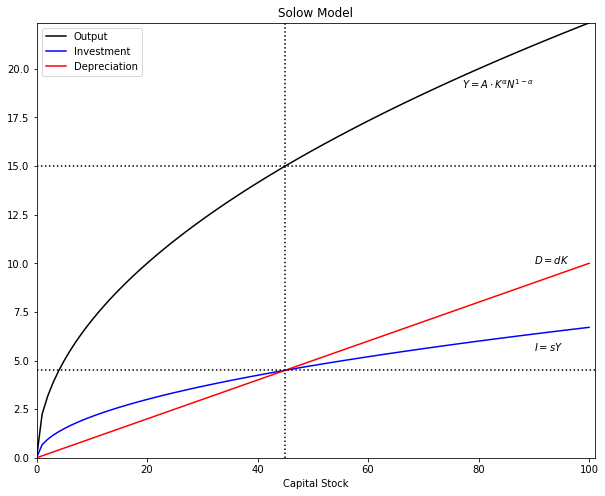

In [ ]:
"1|IMPORT PACKAGES"
import numpy as np               # Package for scientific computing with Python
import matplotlib.pyplot as plt  # Matplotlib is a 2D plotting library

"2|DEFINE PARAMETERS AND ARRAYS"
# Parameters
K_size = 101                     # Model domain
A = 1                            # Total Factor Productivity
N = 5                            # Capital stock
alpha = 0.50                     # Output elasticity of capital
s = 0.30                         # Savings rate
d = 0.10                         # Depreciation rate
#Arrays
K = np.arange(K_size)            # Create empty array of K

"3|DEFINE FUNCTIONS"
def output(K):   # Cobb-Douglas Production Function
    Y = A * (K)**(alpha) * (N)**(1-alpha)    
    return Y

"4|POPULATE ARRAYS"
Y = output(K)
D = d*K
I = s*Y

"5|CALCULATE STEADY-STATE VALUES"
Kstar = ((s*A*(N)**(1-alpha))/d)**(1/(1-alpha))
Ystar = A  *(Kstar**alpha)*((N)**(1-alpha))
Istar = s*Ystar
Cstar = Ystar - Istar
Dstar = d*Kstar

"6|PLOT THE SOLOW MODEL"
y_max = np.max(Y)
v = [0, K_size, 0, y_max]

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(K, Y, "k", ls = '-', label="Output")
ax.plot(K, I, "b", ls = '-', label="Investment")
ax.plot(K, D, "r", ls = '-', label="Depreciation")
ax.set(title="Solow Model", xlabel="Capital Stock")
plt.text(77, 19,  r'$Y = A \cdot K^{\alpha} N^{1-\alpha}$')
plt.text(90, 10,  r'$D = dK$')
plt.text(90, 5.5, r'$I = sY$')
plt.legend(loc=2)
plt.axvline(x = Kstar, ls = ":", color = 'k')
plt.axhline(y = Istar, ls = ":", color = 'k')
plt.axhline(y = Ystar, ls = ":", color = 'k')
plt.axis(v)
plt.show()

## 3. SHOCKS

Starting from the steady-state, the effect of different schocks can be analyzed. A well-known feature of the Solow model is that an increase in the savings rate $(s)$, while it does produce level effects, does not have long-run effects on the growth rate of income per capita $(y)$. The reason is that capital productivity has decreasing marginal returns while capital loss (depreciation plus dilution) has constant returns. At some point, the stock of capital is so large that it cannot produce enough income to replace capital loss and increase the stock.

For each case, assume that starting in $t=0$ the model is in is steady-state and the shocks occurs in $t=10$.

### 3.1. Savings Rate

Let the savings rate increase from $s_1$ to $s_2$. This produces an upward shift in the investment line, but produces no change on output or on the break-even line. Now investment is more than the break-even point producing an increase in the capital stock. If the shock is permanent, then $k^*$ moves outward initiating a new convergence movemente to the **new** steady-state values. If the shock is for a one period only, then the model **returns** to its original steady-state. Note that the convergence to the steady-state (old or new) is asympthotic: $\{k, y, i, d, c\}_{t \to \infty} \to \{k^*, y^*, i^*, d^*, c^*\}$.

The code below plots the Solow model and the effects of a one-time and a permanent shock to the savings rate.

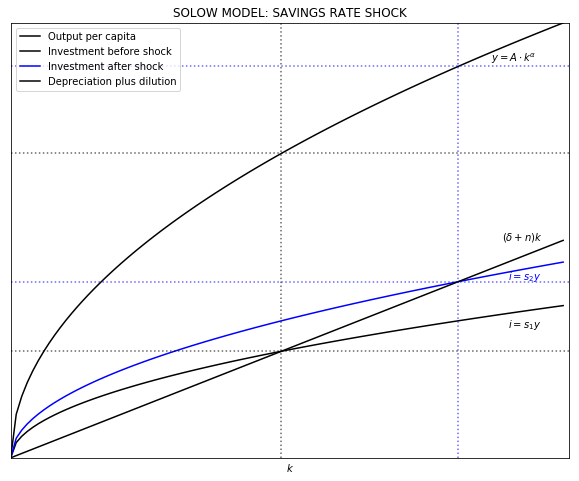

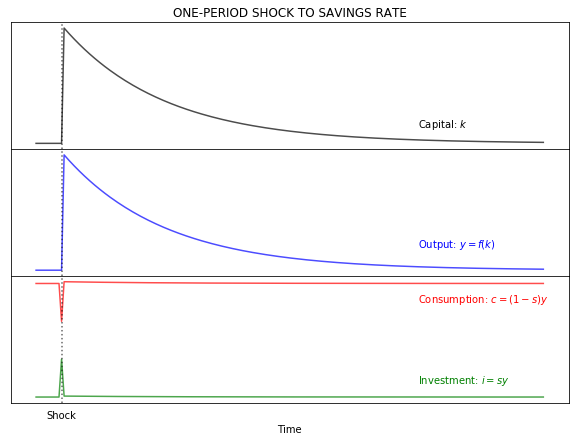

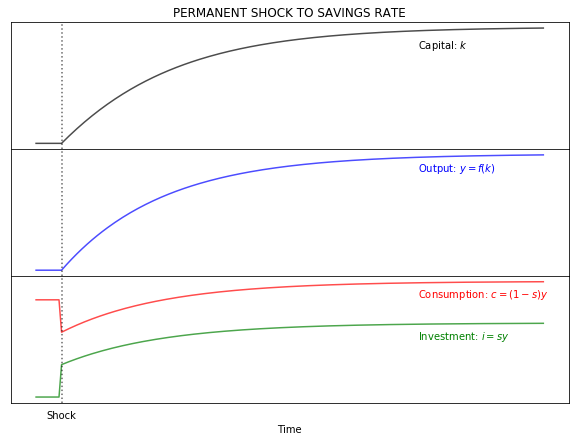

In [ ]:
"1|IMPORT PACKAGES"
import numpy as np               # Package for scientific computing with Python
import matplotlib.pyplot as plt  # Matplotlib is a 2D plotting library

"2|DEFINE PARAMETERS AND ARRAYS|"
# Parameters
K_size = 101                     # Model domain
A = 1                            # Total Factor Productivity
alpha = 0.50                     # Output elasticity of capital
delta = 0.03                     # Depreciation rate
s1 = 0.35                        # Savings rate before the shock
s2 = 0.45                        # Savings rate after the shock
n  = 0.02                        # Population growth rate
# Arrays
k  = np.arange(K_size)           # Create array of k

"3|DEFINE FUNCTIONS"
def output(k):                   # Cobb-Douglas per capita function
    y = A * (k)**(alpha)
    return y

y  = output(k)                   # Production function
d  = delta*k                     # Depreciation
i1 = s1*y                        # Investment before the shock
i2 = s2*y                        # Investment after the shock
d_and_i = (delta + n)*k          # Breack-even

"4|CALCULATE STEADY-STATE VALUES"
k_star1 = (s1/(n+delta)*A)**(1/(1-alpha))
k_star2 = (s2/(n+delta)*A)**(1/(1-alpha))
y_star1 = A*(k_star1**alpha)
y_star2 = A*(k_star2**alpha)
i_star1 = s1*y_star1
i_star2 = s2*y_star2
c_star1 = y_star1 - i_star1
c_star2 = y_star2 - i_star2
d_star1 = delta*k_star1
d_star2 = delta*k_star2

"5|PLOT THE SOLOW MODEL"               
y_max = np.max(y)
v = [0, K_size, 0, y_max]              # Axis range
fig, ax = plt.subplots(figsize=(10, 8))
ax.set(title="SOLOW MODEL: SAVINGS RATE SHOCK", xlabel=r'$k$')
ax.plot(k, y      , "k", ls = '-', label="Output per capita")
ax.plot(k, i1     , "k", ls = '-', label="Investment before shock")
ax.plot(k, i2     , "b", ls = '-', label="Investment after shock")
ax.plot(k, d_and_i, "k", ls = '-', label="Depreciation plus dilution")
plt.text(87, 9.1, r'$y = A \cdot k^{\alpha}$', color = 'k')
plt.text(89, 5.0, r'$(\delta + n)k$'         , color = 'k')
plt.text(90, 3.0, r'$i = s_{1}y$'            , color = 'k')
plt.text(90, 4.1, r'$i = s_{2}y$'            , color = "b")
plt.legend(loc=2)
plt.axvline(x = k_star1, ls = ":", color = 'k', alpha = 0.6)
plt.axhline(y = i_star1, ls = ":", color = 'k', alpha = 0.6)
plt.axhline(y = y_star1, ls = ":", color = 'k', alpha = 0.6)
plt.axvline(x = k_star2, ls = ":", color = 'b', alpha = 0.6)
plt.axhline(y = i_star2, ls = ":", color = 'b', alpha = 0.6)
plt.axhline(y = y_star2, ls = ":", color = 'b', alpha = 0.6)
ax.yaxis.set_major_locator(plt.NullLocator())      # Hide ticks
ax.xaxis.set_major_locator(plt.NullLocator())      # Hide ticks
plt.axis(v)
plt.show()

"6|SAVINGS RATE: ONE-PERIOD SHOCK"
T = 200                 # Number of periods
t_shock = 10            # Period when shock happens
time = np.arange(T)     # Create array of time
s = np.zeros(T)         # Create array of s
y = np.zeros(T)         # Create array of y
k = np.zeros(T)         # Create array of k
i = np.zeros(T)         # Create array of i
c = np.zeros(T)         # Create array of c

y[0] = y_star1          # Set initial value of y
k[0] = k_star1          # Set initial value of k
i[0] = i_star1          # Set initial value of i
c[0] = c_star1          # Set initial value of c

s = np.zeros(T)
s[0:T] = s1             # Array of savings rate
s[t_shock] = s2         # Shock to savings rate

for j in range(1, T):
    k[j] = k[j-1] + i[j-1] - (n + delta)*k[j-1]
    y[j] = A*k[j]**alpha
    i[j] = s[j]*y[j]
    c[j] = y[j] - i[j]
    
### Plot effect on variables
ticks = [""]*T                                  # Create tick labels
ticks[t_shock] = 'Shock'                        # Create label "shock" 

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10, 7))
fig.subplots_adjust(hspace=0)                   # Plots be next to each other
ax1.set(title="ONE-PERIOD SHOCK TO SAVINGS RATE")
ax1.plot(time, k, "k-", alpha = 0.7)
ax1.axvline(x = t_shock, color="k", ls = ':', alpha = 0.6)
ax1.yaxis.set_major_locator(plt.NullLocator())  # Hide ticks
ax1.text(150, 49.1, 'Capital: '+r'$k$')

ax2.plot(time, y, "b-", alpha = 0.7)
ax2.axvline(x = t_shock, color="k", ls = ':', alpha = 0.6)
ax2.yaxis.set_major_locator(plt.NullLocator())  # Hide ticks
ax2.text(150, 7.01, 'Output: '+ r'$y=f(k)$', color = "b")

ax3.plot(time, i, "g-", alpha = 0.7)
ax3.plot(time, c, "r-", alpha = 0.7)
ax3.axvline(x = t_shock, color="k", ls = ':', alpha = 0.6)
ax3.yaxis.set_major_locator(plt.NullLocator())  # Hide ticks
ax3.xaxis.set_major_locator(plt.NullLocator())  # Hide ticks
ax3.text(150, 4.2, 'Consumption: '+r'$c = (1-s)y$', color = "r")
ax3.text(150, 2.7, 'Investment: '+r'$i = sy$'     , color = "g")
plt.xticks(time, ticks)                         # Use user-defined ticks
plt.xlabel('Time')
plt.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=True, left=False, right=False, labelleft=True)
                                                # Hide tick marks

"8|SAVINGS RATE: PERMANENT SHOCK"
time = np.arange(T)     # Create array of time
s = np.zeros(T)         # Create array of s
y = np.zeros(T)         # Create array of y
k = np.zeros(T)         # Create array of k
i = np.zeros(T)         # Create array of i
c = np.zeros(T)         # Create array of c

y[0] = y_star1          # Set initial value of y
k[0] = k_star1          # Set initial value of k
i[0] = i_star1          # Set initial value of i
c[0] = c_star1          # Set initial value of c

s = np.zeros(T)
s[0:t_shock] = s1       # Array of savings rate
s[t_shock:T] = s2       # Shock to savings rate

for j in range(1, T):
    k[j] = k[j-1] + i[j-1] - (n + delta)*k[j-1]
    y[j] = A*k[j]**alpha
    i[j] = s[j]*y[j]
    c[j] = y[j] - i[j]
    
### Plot effect on variables
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10, 7))
fig.subplots_adjust(hspace=0)                    # Plots be next to each other
ax1.set(title="PERMANENT SHOCK TO SAVINGS RATE")
ax1.plot(time, k, "k-", alpha = 0.7)
ax1.axvline(x = t_shock, color="k", ls = ':', alpha = 0.6)
ax1.yaxis.set_major_locator(plt.NullLocator())   # Hide ticks
ax1.text(150, 75.1, 'Capital: '+r'$k$')

ax2.plot(time, y, "b-", alpha = 0.7)
ax2.axvline(x = t_shock, color="k", ls = ':', alpha = 0.6)
ax2.yaxis.set_major_locator(plt.NullLocator())   # Hide ticks
ax2.text(150, 8.7, 'Output: '+ r'$y=f(k)$', color = "b")

ax3.plot(time, i, "g-", alpha = 0.7)
ax3.plot(time, c, "r-", alpha = 0.7)
ax3.axvline(x = t_shock, color="k", ls = ':', alpha = 0.6)
ax3.yaxis.set_major_locator(plt.NullLocator())   # Hide ticks
ax3.xaxis.set_major_locator(plt.NullLocator())   # Hide ticks
ax3.text(150, 4.6, 'Consumption: '+r'$c = (1-s)y$', color = "r")
ax3.text(150, 3.7, 'Investment: '+r'$i = sy$'     , color = "g")
plt.xticks(time, ticks)                          # Use user-defined ticks
plt.xlabel('Time')
plt.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=True, left=False, right=False, labelleft=True)
                                                # Hide tick marks


### 3.2 Population growth rate

In the case of an increase in the growth rate of population $(n)$, capital per capita falls. Now investment is less than the break-even point. Capital stock cannot keep up with the higher growth rate of population. Similarly to a shock to the savings rate, a one-period shock moves the model out of its steady-state and then it **returns** to its original position. A permanent shock makes the model converge to a **new** steady-state. Note that a change in the depreciation rate produces the same effects than a change in population growth rate. 

The code below is similar to the previous one. The difference is that the shock is affecting $n$ instead of $s$.

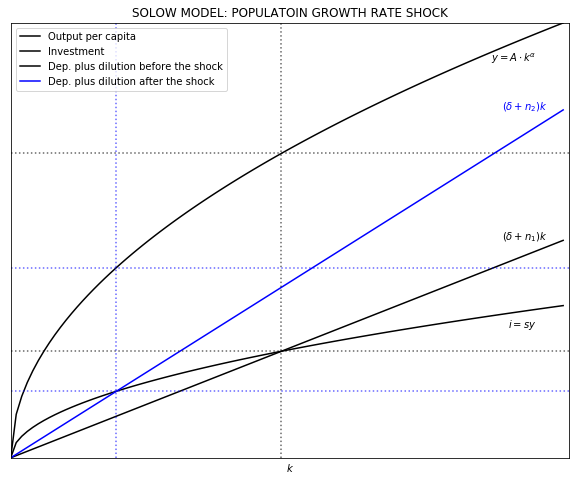

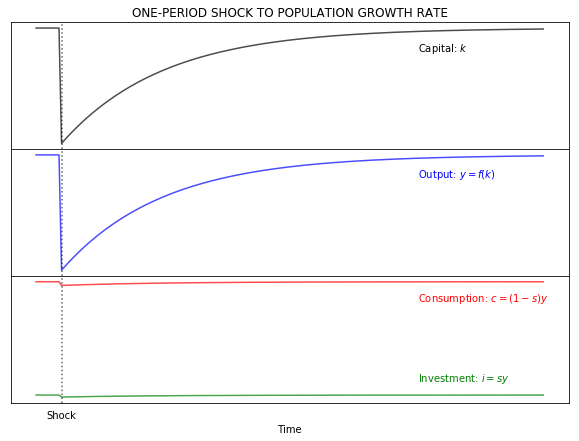

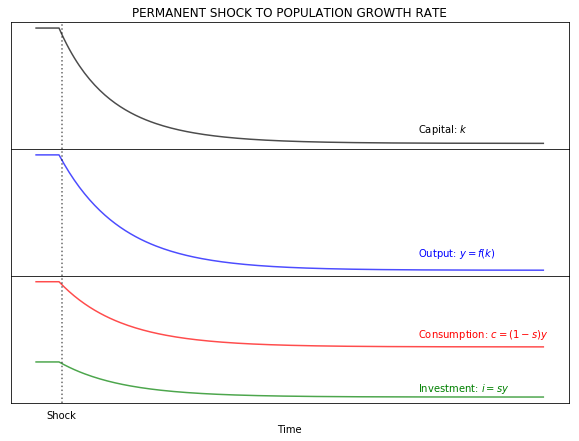

In [ ]:
"1|IMPORT PACKAGES"
import numpy as np               # Package for scientific computing with Python
import matplotlib.pyplot as plt  # Matplotlib is a 2D plotting library

"2|DEFINE PARAMETERS AND ARRAYS|"
#Parameters
K_size = 101                     # Model domain
A = 1                            # Total Factor Productivity
alpha = 0.50                     # Output elasticity of capital
delta = 0.03                     # Depreciation rate
s  = 0.35                        # Savings rate
n1 = 0.02                        # Population growth rate before the shock
n2 = 0.05                        # Population growth rate after the shock
# Arrays
k  = np.arange(K_size)           # Create array of k

"3|DEFINE FUNCTIONS"
def output(k):   # Cobb-Douglas Production Function (per capita)
    y = A * (k)**(alpha)    
    return y

y = output(k)
d = delta*k
i = s*y
d_and_i1 = (delta + n1)*k
d_and_i2 = (delta + n2)*k

"4|CALCULATE STEADY-STATE VALUES"
k_star1 = (s/(n1+delta)*A)**(1/(1-alpha))
k_star2 = (s/(n2+delta)*A)**(1/(1-alpha))
y_star1 = A*(k_star1**alpha)
y_star2 = A*(k_star2**alpha)
i_star1 = s*y_star1
i_star2 = s*y_star2
c_star1 = y_star1 - i_star1
c_star2 = y_star2 - i_star2
d_star1 = delta*k_star1
d_star2 = delta*k_star2

"5|PLOT THE SOLOW MODEL"
y_max = np.max(y)
v = [0, K_size, 0, y_max]              # Axis range
fig, ax = plt.subplots(figsize=(10, 8))
ax.set(title="SOLOW MODEL: POPULATOIN GROWTH RATE SHOCK", xlabel=r'$k$')
ax.plot(k, y       , "k", ls='-', label="Output per capita")
ax.plot(k, i       , "k", ls='-', label="Investment")
ax.plot(k, d_and_i1, "k", ls='-', label="Dep. plus dilution before the shock")
ax.plot(k, d_and_i2, "b", ls='-', label="Dep. plus dilution after the shock")
plt.text(87, 9.1, r'$y = A \cdot k^{\alpha}$', color = 'k')
plt.text(89, 5.0, r'$(\delta + n_{1})k$'     , color = 'k')
plt.text(89, 8.0, r'$(\delta + n_{2})k$'     , color = "b")
plt.text(90, 3.0, r'$i = sy$'                , color = 'k')
plt.legend(loc=2)
plt.axvline(x = k_star1, ls = ":", color = 'k', alpha = 0.6)
plt.axhline(y = i_star1, ls = ":", color = 'k', alpha = 0.6)
plt.axhline(y = y_star1, ls = ":", color = 'k', alpha = 0.6)
plt.axvline(x = k_star2, ls = ":", color = 'b', alpha = 0.6)
plt.axhline(y = i_star2, ls = ":", color = 'b', alpha = 0.6)
plt.axhline(y = y_star2, ls = ":", color = 'b', alpha = 0.6)
ax.yaxis.set_major_locator(plt.NullLocator())      # Hide ticks
ax.xaxis.set_major_locator(plt.NullLocator())      # Hide ticks
plt.axis(v)
plt.show()

"6|SPOPULATION GROWTH RATE: ONE-PERIOD SHOCK"
T = 200                 # Number of periods
t_shock = 10            # Period when shock happens
time = np.arange(T)     # Create array of time
y = np.zeros(T)         # Create array of y
k = np.zeros(T)         # Create array of k
i = np.zeros(T)         # Create array of i
c = np.zeros(T)         # Create array of c

y[0] = y_star1          # Set initial value of y
k[0] = k_star1          # Set initial value of k
i[0] = i_star1          # Set initial value of i
c[0] = c_star1          # Set initial value of c

n = np.zeros(T)
n[0:T] = n1             # Population
n[t_shock] = n2         # Shock to population

for j in range(1, T):
    k[j] = k[j-1] + i[j-1] - (n[j] + delta)*k[j-1]
    y[j] = A*k[j]**alpha
    i[j] = s*y[j]
    c[j] = y[j] - i[j]
    
### Plot effect on variables
ticks = [""]*T                                  # Create tick labels
ticks[t_shock] = 'Shock'                        # Create label "shock" 

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10, 7))
fig.subplots_adjust(hspace=0)                   # Plots be next to each other
ax1.set(title="ONE-PERIOD SHOCK TO POPULATION GROWTH RATE")
ax1.plot(time, k, "k-", alpha = 0.7)
ax1.axvline(x = t_shock, color="k", ls = ':', alpha = 0.6)
ax1.yaxis.set_major_locator(plt.NullLocator())  # Hide ticks
ax1.text(150, 48.7, 'Capital: '+r'$k$')

ax2.plot(time, y, "b-", alpha = 0.7)
ax2.axvline(x = t_shock, color="k", ls = ':', alpha = 0.6)
ax2.yaxis.set_major_locator(plt.NullLocator())  # Hide ticks
ax2.text(150, 6.98, 'Output: '+ r'$y=f(k)$', color = "b")

ax3.plot(time, i, "g-", alpha = 0.7)
ax3.plot(time, c, "r-", alpha = 0.7)
ax3.axvline(x = t_shock, color="k", ls = ':', alpha = 0.6)
ax3.yaxis.set_major_locator(plt.NullLocator())  # Hide ticks
ax3.xaxis.set_major_locator(plt.NullLocator())  # Hide ticks
ax3.text(150, 4.2, 'Consumption: '+r'$c = (1-s)y$', color = "r")
ax3.text(150, 2.7, 'Investment: '+r'$i = sy$'     , color = "g")
plt.xticks(time, ticks)                         # Use user-defined ticks
plt.xlabel('Time')
plt.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=True, left=False, right=False, labelleft=True)
                                                # Hide tick marks

"7|POPULATION GROWTH RATE: PERMANENT SHOCK"
time = np.arange(T)     # Create array of time
y = np.zeros(T)         # Create array of y
k = np.zeros(T)         # Create array of k
i = np.zeros(T)         # Create array of i
c = np.zeros(T)         # Create array of c

y[0] = y_star1          # Set initial value of y
k[0] = k_star1          # Set initial value of k
i[0] = i_star1          # Set initial value of i
c[0] = c_star1          # Set initial value of c

n = np.zeros(T)
n[0:T] = n1             # Population
n[t_shock:T] = n2       # Population shock

for j in range(1, T):
    k[j] = k[j-1] + i[j-1] - (n[j] + delta)*k[j-1]
    y[j] = A*k[j]**alpha
    i[j] = s*y[j]
    c[j] = y[j] - i[j]
    
### Plot effect on variables
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10, 7))
fig.subplots_adjust(hspace=0)                    # Plots be next to each other
ax1.set(title="PERMANENT SHOCK TO POPULATION GROWTH RATE")
ax1.plot(time, k, "k-", alpha = 0.7)
ax1.axvline(x = t_shock, color="k", ls = ':', alpha = 0.6)
ax1.yaxis.set_major_locator(plt.NullLocator())   # Hide ticks
ax1.text(150, 22.1, 'Capital: '+r'$k$')

ax2.plot(time, y, "b-", alpha = 0.7)
ax2.axvline(x = t_shock, color="k", ls = ':', alpha = 0.6)
ax2.yaxis.set_major_locator(plt.NullLocator())   # Hide ticks
ax2.text(150, 4.7, 'Output: '+ r'$y=f(k)$', color = "b")

ax3.plot(time, i, "g-", alpha = 0.7)
ax3.plot(time, c, "r-", alpha = 0.7)
ax3.axvline(x = t_shock, color="k", ls = ':', alpha = 0.6)
ax3.yaxis.set_major_locator(plt.NullLocator())   # Hide ticks
ax3.xaxis.set_major_locator(plt.NullLocator())   # Hide ticks
ax3.text(150, 3.1, 'Consumption: '+r'$c = (1-s)y$', color = "r")
ax3.text(150, 1.7, 'Investment: '+r'$i = sy$'     , color = "g")
plt.xticks(time, ticks)                          # Use user-defined ticks
plt.xlabel('Time')
plt.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=True, left=False, right=False, labelleft=True)
                                                # Hide tick marks

### 3.3 GROWTH RATE OF TECHNOLOGY

In general terms, $(A)$ captures *total factor productivity* (TFP). If $fp_{j}, j = \{1, \dotsc, J \}$ are $J$ factors of production, then:

$$A = \frac{Y}{F\left(fp_{1}, \cdots, fp_{J}\right)}$$


Repeated increases in productivity produces the effect in output shown in section 2. Since output is increasing, so does investment. This produces a permanent outward shift of $k^*$. The savings rate is bounded between 0 and 1, but $A$ can grow indefinitely. Also note the exponential effect on output, investment, and consumption. Starting at the stead-state position, an increase in productivity means that investment is more than the break-even value and therefore modes starts to converge to a permanent moving steady-state position. This case of productivity gains can be described as *cutting-edge* growth. Different is the case of *catching-up growth*, which is the situation of the model approaching a fixed steady-state position (e.g. after a one-period shock).

A one-time time shock to TFP moves the model out of equilibrium until it **returns** to its original position. But, a permanent increase in $\gamma$ can produce a **continuous** growth of the steady-state values. This implies that steady-state values grow at the growth rate ot TFP, $\gamma$.

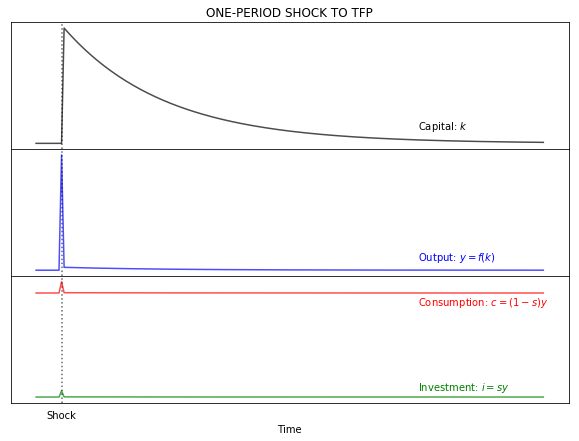

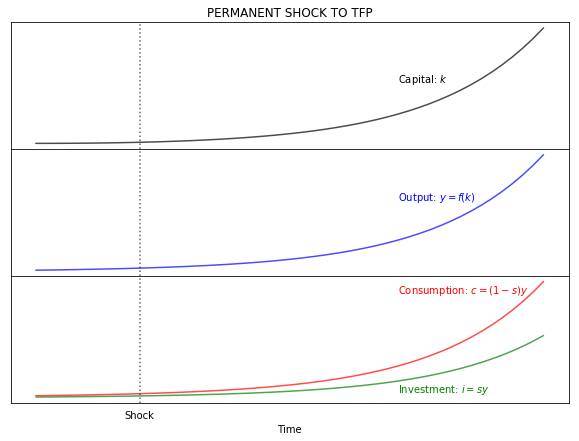

In [ ]:
"1|IMPORT PACKAGES"
import numpy as np               # Package for scientific computing with Python
import matplotlib.pyplot as plt  # Matplotlib is a 2D plotting library

"2|DEFINE PARAMETERS AND ARRAYS|"
# Parameters
K_size = 101                     # Model domain
A = 1                            # Total Factor Productivity
alpha = 0.50                     # Output elasticity of capital
delta = 0.03                     # Depreciation rate
s = 0.35                         # Savings rate
n = 0.02                         # Population growth rate
# Arrays
k = np.arange(K_size)            # Create array of k
y = np.zeros(K_size)             # Create array of y
d = np.zeros(K_size)             # Create array of d
i = np.zeros(K_size)             # Create array of i
c = np.zeros(K_size)             # Create array of c
d_and_i = np.zeros(K_size)       # Break-even before the shock

"3|CALCULATE STEADY-STATE VALUES"
k_star1 = (s/(n+delta)*A)**(1/(1-alpha))
k_star2 = (s/(n+delta)*A)**(1/(1-alpha))
y_star1 = A*(k_star1**alpha)
y_star2 = A*(k_star2**alpha)
i_star1 = s*y_star1
i_star2 = s*y_star2
c_star1 = y_star1 - i_star1
c_star2 = y_star2 - i_star2
d_star1 = delta*k_star1
d_star2 = delta*k_star2

"4|TOTAL FACTROR PRODUCTIVITY: ONE-PERIOD SHOCK"
T = 200                 # Number of periods
t_shock = 10            # Period when shock happens
time = np.arange(T)     # Create array of time
alpha = 0.50            # Output elasticity of capital
delta = 0.03            # Depreciation rate
s = 0.35                # Savings rate
n = 0.02                # Population growth rate before the shock
g = 0.05                # Growth rate of TFP
k = np.zeros(T)         # Create array of k
y = np.zeros(T)         # Create array of y
d = np.zeros(T)         # Create array of d
i = np.zeros(T)         # Create array of i
c = np.zeros(T)         # Create array of c
d_and_i = np.zeros(T)   # Depreciation plus dilution before the shock

y[0] = y_star1          # Set initial value of y
k[0] = k_star1          # Set initial value of k
i[0] = i_star1          # Set initial value of i
c[0] = c_star1          # Set initial value of c

TFP = np.empty(T)       # Create array of TFP including shock
TFP[0:T] = A
TFP[t_shock] = A*(1+g)

for j in range(1, T):
    k[j] = k[j-1] + i[j-1] - (n + delta)*k[j-1]
    y[j] = TFP[j]*k[j]**alpha
    i[j] = s*y[j]
    c[j] = y[j] - i[j]
    
### Plot effect on variables
ticks = [""]*T                                  # Create tick labels
ticks[t_shock] = 'Shock'                        # Create label "shock" 

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10, 7))
fig.subplots_adjust(hspace=0)                   # Plots be next to each other
ax1.set(title="ONE-PERIOD SHOCK TO TFP")
ax1.plot(time, k, "k-", alpha = 0.7)
ax1.axvline(x = t_shock, color="k", ls = ':', alpha = 0.6)
ax1.yaxis.set_major_locator(plt.NullLocator())  # Hide ticks
ax1.text(150, 49.015, 'Capital: '+r'$k$')

ax2.plot(time, y, "b-", alpha = 0.7)
ax2.axvline(x = t_shock, color="k", ls = ':', alpha = 0.6)
ax2.yaxis.set_major_locator(plt.NullLocator())  # Hide ticks
ax2.text(150, 7.03, 'Output: '+ r'$y=f(k)$', color = "b")

ax3.plot(time, i, "g-", alpha = 0.7)
ax3.plot(time, c, "r-", alpha = 0.7)
ax3.axvline(x = t_shock, color="k", ls = ':', alpha = 0.6)
ax3.yaxis.set_major_locator(plt.NullLocator())  # Hide ticks
ax3.xaxis.set_major_locator(plt.NullLocator())  # Hide ticks
ax3.text(150, 4.3, 'Consumption: '+r'$c = (1-s)y$', color = "r")
ax3.text(150, 2.6, 'Investment: '+r'$i = sy$'     , color = "g")
plt.xticks(time, ticks)                         # Use user-defined ticks
plt.xlabel('Time')
plt.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=True, left=False, right=False, labelleft=True)
                                                # Hide tick marks

"5|TOTAL FACTOR PRODUCTIVITY: PERMANENT SHOCK"
T = 50
time = np.arange(T)     # Create array of time
y = np.zeros(T)         # Create array of y
k = np.zeros(T)         # Create array of k
i = np.zeros(T)         # Create array of i
c = np.zeros(T)         # Create array of c

y[0] = y_star1          # Set initial value of y
k[0] = k_star1          # Set initial value of k
i[0] = i_star1          # Set initial value of i
c[0] = c_star1          # Set initial value of c

TFP = np.zeros(T)       # Create array of TFP including shock
TFP[0:T] = A

for j in range(1, T):
    TFP[j] = TFP[j-1]*(1+g)
    k[j] = k[j-1] + i[j-1] - (n + delta)*k[j-1]
    y[j] = TFP[j]*k[j]**alpha
    i[j] = s*y[j]
    c[j] = y[j] - i[j]

### Plot effect on variables
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10, 7))
fig.subplots_adjust(hspace=0)                    # Plots be next to each other
ax1.set(title="PERMANENT SHOCK TO TFP")
ax1.plot(time, k, "k-", alpha = 0.7)
ax1.axvline(x = t_shock, color="k", ls = ':', alpha = 0.6)
ax1.yaxis.set_major_locator(plt.NullLocator())   # Hide ticks
ax1.text(35, 400, 'Capital: '+r'$k$')

ax2.plot(time, y, "b-", alpha = 0.7)
ax2.axvline(x = t_shock, color="k", ls = ':', alpha = 0.6)
ax2.yaxis.set_major_locator(plt.NullLocator())   # Hide ticks
ax2.text(35, 180, 'Output: '+ r'$y=f(k)$', color = "b")

ax3.plot(time, i, "g-", alpha = 0.7)
ax3.plot(time, c, "r-", alpha = 0.7)
ax3.axvline(x = t_shock, color="k", ls = ':', alpha = 0.6)
ax3.yaxis.set_major_locator(plt.NullLocator())   # Hide ticks
ax3.xaxis.set_major_locator(plt.NullLocator())   # Hide ticks
ax3.text(35, 170, 'Consumption: '+r'$c = (1-s)y$', color = "r")
ax3.text(35, 10 , 'Investment: '+r'$i = sy$'     , color = "g")
plt.xticks(time, ticks)                          # Use user-defined ticks
plt.xlabel('Time')
plt.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=True, left=False, right=False, labelleft=True)
                                                # Hide tick marks

## 4. PHASE DIAGRAM AND CONVERGENCE

Note that this is a stable model with two steady states; $k_{1}^* = 0$ and $k_{2}^* = \left[ A \cdot \frac{s}{\delta + n} \right]^{\frac{1}{1-\alpha}}$. Once $k$ has any positive value, the model will converge to $k_{2}^*$.

This behavior of $k$ can be shown with a phase diagram that relates changes in $k$ with values of k (same function thatn section 2.2:

\begin{align}
    \Delta(k) &= h(k)                                 \\
    \Delta(k) &= s \cdot Ak^{\alpha} - (n + \delta)k
\end{align}

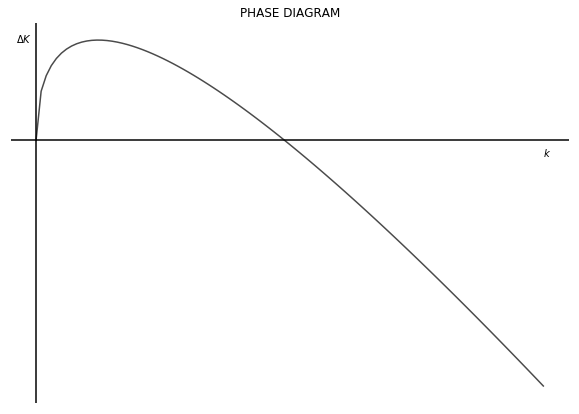

In [ ]:
"1|IMPORT PACKAGES"
import numpy as np               # Package for scientific computing with Python
import matplotlib.pyplot as plt  # Matplotlib is a 2D plotting library

"2|DEFINE PARAMETERS AND ARRAYS|"
# Parameters
K_size = 101                     # Model domain
A = 1                            # Total Factor Productivity
alpha = 0.50                     # Output elasticity of capital
delta = 0.03                     # Depreciation rate
s = 0.35                         # Savings rate
n = 0.02                         # Population growth rate
# Arrays
k = np.arange(K_size)            # Create array of k
y = np.zeros(K_size)             # Create array of y
d = np.zeros(K_size)             # Create array of d
i = np.zeros(K_size)             # Create array of i
c = np.zeros(K_size)             # Create array of c
d_and_i = np.zeros(K_size)       # Break-even before the shock

"3|DEFINE MOTION FUNCTION|"
def motion(k):                   # Motion function of k
    DeltaK = s * A*(k)**(alpha) - (n + delta)*k    
    return DeltaK

DeltaK = motion(k)               # Change in K

"4|PLOT PHASE DIAGRAM"
fig, ax1 = plt.subplots(figsize=(10, 7))
ax1.set(title="PHASE DIAGRAM")
ax1.plot(k, DeltaK, "k-", alpha = 0.7)
ax1.yaxis.set_major_locator(plt.NullLocator())  # Hide ticks
ax1.xaxis.set_major_locator(plt.NullLocator())  # Hide ticks
ax1.axvline(x=0, color = 'k')
ax1.axhline(y=0, color = 'k')
plt.box(False)                                  # Hide plot borders
plt.text(100, -0.1, r'$k$')
plt.text( -4,  0.6, r'$\Delta K$')
plt.show()

---
The vertical axis is showing how much does capital per capita change for each value of $k$. In other words, the value on the vertical axis shows how much in the next period $k$ will move to the right on the horizontal axis. Then, the phase diagram is also showing the speed of convergence to $k_{2}^*$. The closer $k$ is to $k_{2}^*$ the slower capital per capita is growing. 

This effect is shown in the plots below with three different starting points of $k$. The *high* starting value of $k$ is at 90% of the steady-state value of $k^*$. The *medium* starting point of $k$ is at 50% of the steady-state value. And the *low* sarting value of $k$ is at 10% of the steady-state value. The first plot shows again the phase diagram with the starin position of each point. The second graph shows the evolution of $k$ for each starting point in time. The color black denotes the starting point high capital value, the blue color denotes the medium strating point, and the red color denotes the low starting point.

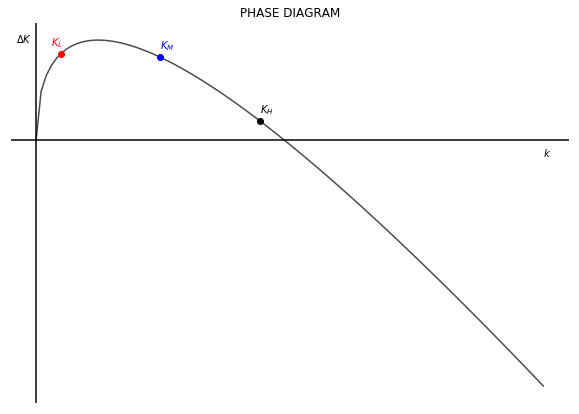

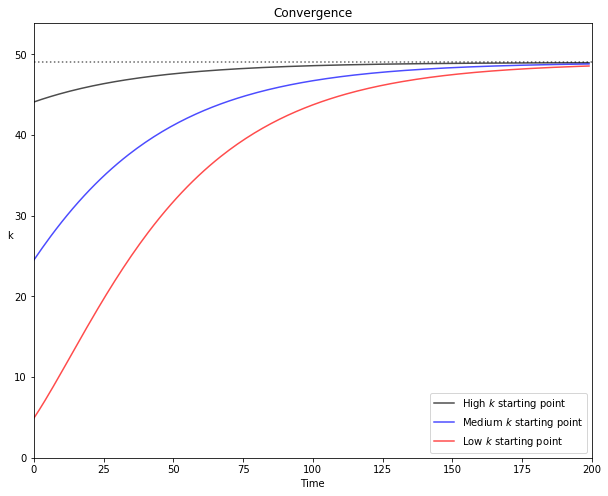

In [ ]:
"1|IMPORT PACKAGES"
import numpy as np               # Package for scientific computing with Python
import matplotlib.pyplot as plt  # Matplotlib is a 2D plotting library

"2|DEFINE PARAMETERS AND ARRAYS|"
# Parameters
K_size = 101                     # Model domain
A = 1                            # Total Factor Productivity
alpha = 0.50                     # Output elasticity of capital
delta = 0.03                     # Depreciation rate
s = 0.35                         # Savings rate
n = 0.02                         # Population growth rate
# Arrays
k = np.arange(K_size)            # Create array of k

"3|PLOT CHANGE IN CAPITAL FOR DIFFERENT STARTING POINTS"
T = 200
time = np.arange(T)
k1 = np.zeros(T)
k2 = np.zeros(T)
k3 = np.zeros(T)

k_star = (s/(n+delta)*A)**(1/(1-alpha))
k1[0] = k_star * 0.9
k2[0] = k_star * 0.5
k3[0] = k_star * 0.1

def output(k):   # Cobb-Douglas Production Function (per capita)
    y = A * (k)**(alpha)    
    return y

def motion(k):                   # Motion function of k
    DeltaK = s * A*(k)**(alpha) - (n + delta)*k    
    return DeltaK

DeltaK = motion(k)

Kdelta1 = motion(k1[0]) 
Kdelta2 = motion(k2[0])
Kdelta3 = motion(k3[0])

#### Phase Diagram
fig, ax1 = plt.subplots(figsize=(10, 7))
ax1.set(title="PHASE DIAGRAM")
ax1.plot(k, DeltaK, "k-", alpha = 0.7)
ax1.yaxis.set_major_locator(plt.NullLocator())  # Hide ticks
ax1.xaxis.set_major_locator(plt.NullLocator())  # Hide ticks
ax1.axvline(x=0, color = 'k')
ax1.axhline(y=0, color = 'k')
plt.box(False)                                  # Hide plot borders
plt.text(100, -0.1, r'$k$')
plt.text( -4,  0.6, r'$\Delta K$')
plt.plot(k1[0], Kdelta1, 'ko')                  # Add dot for K-high
plt.plot(k2[0], Kdelta2, 'bo')                  # Add dot for K-medium
plt.plot(k3[0], Kdelta3, 'ro')                  # Add for for K-low
plt.text(k1[0]  , Kdelta1+0.05, r'$K_{H}$', color = 'k')
plt.text(k2[0]  , Kdelta2+0.05, r'$K_{M}$', color = 'b')
plt.text(k3[0]-2, Kdelta3+0.05, r'$K_{L}$', color = 'r')

### Plot change of capital in time for each starting value (high, medium, low)
for j in range(1, T):
    k1[j] = k1[j-1] + s*output(k1[j-1]) - (delta + n)*k1[j-1]
    k2[j] = k2[j-1] + s*output(k2[j-1]) - (delta + n)*k2[j-1]
    k3[j] = k3[j-1] + s*output(k3[j-1]) - (delta + n)*k3[j-1]

v = [0, T, 0, k_star*1.1]              # Axis range
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(time, k1, "k-", label="High $k$ starting point"  , alpha = 0.7)
ax.plot(time, k2, "b-", label="Medium $k$ starting point", alpha = 0.7)
ax.plot(time, k3, "r-", label="Low $k$ starting point"   , alpha = 0.7)
ax.set(title="Convergence", xlabel=r'$k$')
plt.legend(loc=4)
plt.axhline(y = k_star, ls = ":", color = 'k', alpha = 0.6)
plt.axis(v)
plt.xlabel('Time')
plt.ylabel('k', rotation = 0)
plt.show()

## 5. THE GOLDEN RULE

Since the Solow model operates with an exogenous savings rate there is no guarantee that the steady-state will maximize consumption per capita. The savings rate that yields the level of output that maximizes consumption is called the golden-rule, denoted with $g$.

We can obtain $s^g$ in two steps. First, since consumption is the difference between output and investment, we can obtain $k^g$ by maximizing $c$ in terms of $k$.

\begin{align}
 c&= Ak^{\alpha} - (\delta + n)k^g                                            \\
 \frac{\partial c}{\partial k} &= \alpha A k^{\alpha - 1} - (\delta + n) = 0  \\
 k^g &= \left( \frac{\alpha A}{\delta + n} \right)^{\frac{1}{1-\alpha}}
\end{align}

Knowning $k^g$, we can now move to the second step and obtain $s^g$ from the equilibrium condition:

\begin{align}
 sA \left(k^g \right)^{\alpha} &= (\delta + n)k^g                                                                         \\
 s^g &= \frac{\left( \delta+n \right)k^g}{A \cdot \left(k^g \right)^{\alpha}} = \frac{\left( \delta+n \right)k^g}{y(k^g)}
\end{align}

From this the golden-rule value for the other variables can be obtained as well:

\begin{align}
 y^g &= A \cdot \left(k^g \right)^{\alpha} \\
 i^g &= s^g \cdot y^g                      \\
 c^g &= y^g - i^g                          \\
 d^g &= \delta k^g 
\end{align}

### 5.1 THE COBB-DOUGLAS CASE

Note that in the stead-state the level of per capita consumption remains stable (assuming no growth of technology); $c = f(k^*) - (\delta +n)k^*$. Therefore: $\frac{\partial c}{\partial k} = \frac{\partial f(k^*)}{\partial k} - (\delta + n) = 0$; then $\frac{\partial f(k^*)}{\partial k} = (\delta + n)$.

Knowing this, we can re-write the $s^g$ condition in the following way:
\begin{align}
    s^g &= \frac{\left( \delta+n \right)k^g}{y(k^g)}          \\[10pt]
    s^g &= \frac{\left( \delta+n \right)k^g/k^g}{y(k^g)/k^g}  \\[10pt]
    s^g &= \frac{\partial f(k^g)/\partial k^g}{y(k^g)/k^g}
\end{align}

This means that the golden-rule savings rate is equal to the ratio of the marginal product of labor with respect to the average product. In the case of the Cobb-Douglas function, this equals $\alpha$ (the golden-rule savings rate can vary depending on the production function being used).

\begin{align}
    s^g &= \frac{\partial f(k^g)/\partial k^g}{y(k^g)/k^g}  \\[10pt]
    s^g &= \frac{\alpha A k^{\alpha-1}}{A k^{\alpha-1}}     \\[10pt]
    s^g &= \alpha
\end{align}


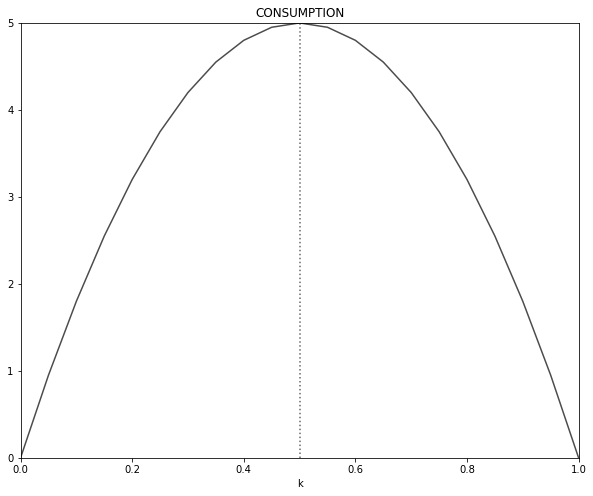

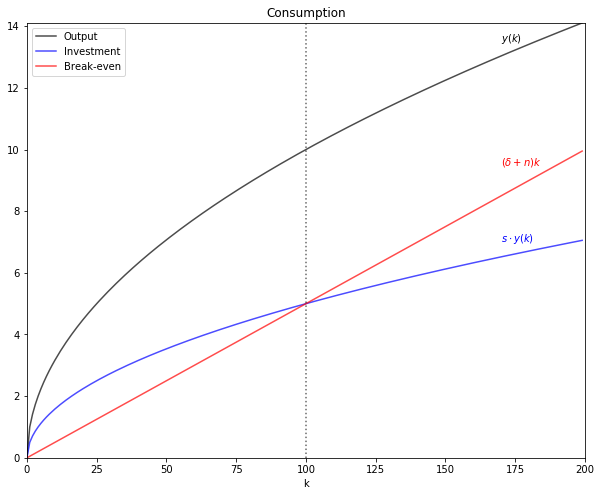

In [ ]:
"1|IMPORT PACKAGES"
import numpy as np               # Package for scientific computing with Python
import matplotlib.pyplot as plt  # Matplotlib is a 2D plotting library

"2|DEFINE PARAMETERS AND ARRAYS|"
# Parameters
K_size = 200                     # Model domain
A = 1                            # Total Factor Productivity
alpha = 0.50                     # Output elasticity of capital
delta = 0.03                     # Depreciation rate
s = 0.35                         # Savings rate
n = 0.02                         # Population growth rate
# Arrays
k = np.arange(K_size)            # Create array of k

"3|CALCULATE GOLDEN-RULE VALUES"
def output(k):   # Cobb-Douglas Production Function (per capita)
    y = A * (k)**(alpha)    
    return y

k_gold = ((alpha*A)/(delta+n))**(1/(1-alpha))
y_gold = output(k_gold)
s_gold = ((delta+n)*k_gold)/y_gold
i_gold = s_gold * y_gold
c_gold = y_gold - i_gold
d_gold = delta*k_gold

"4|PLOT GOLDEN-RULE CONSUMPTION"
#Plot consumption as function of savings
step = 0.05
size = int(1/step)+1
savings = np.arange(0, 1.01, step)

k_s = (savings / (n+delta)*A)**(1/(1-alpha))
y_s = output(k_s)
c_s = (1-savings)*y_s

v = [0, 1, 0, c_gold]
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(savings, c_s, "k-", label="Output", alpha = 0.7)
ax.set(title="CONSUMPTION", xlabel=r'$k$')
plt.axvline(x=s_gold, ls=":", color='k', alpha=0.6)
plt.xlabel('k')
plt.axis(v)
plt.show()

# Plot Solow Model with golden-rule capital
y = output(k)              # Production function
i = s_gold * y             # Investment
c = (1 - s_gold)*y         # Consumption
d_and_i = (delta + n)*k    # Break-even

v = [0, K_size, 0, y[K_size-1]]
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(k, y      , "k-", label="Output"    , alpha = 0.7)
ax.plot(k, i      , "b-", label="Investment", alpha = 0.7)
ax.plot(k, d_and_i, "r-", label="Break-even", alpha = 0.7)
ax.set(title="Consumption", xlabel=r'$k$')
plt.legend(loc=2)
plt.axvline(x = k_gold, ls = ":", color = 'k', alpha = 0.6)
plt.xlabel('k')
plt.text(170, 13.5, r'$y(k)$'         , color = 'k')
plt.text(170,  9.5, r'$(\delta + n)k$', color = 'r')
plt.text(170,  7.0, r'$s \cdot y(k)$' , color = 'b')
plt.axis(v)
plt.show()

## 6. GROWTH ACCOUNTING

Growth accounting allows to separate the drivers of growth of output and obtain the change in TFP as the residual between the observed frowth ouf output and the observed growth of inputs. This difference is the **Solow residual**.

Proceed the following way. Start by total differentiating output. Then divide the total differential by output (this yields the percent change). Then do some algebra to obtain elasticities and "solve for" the growth of TFP. 

\begin{align}
    Y            &= A \cdot F(K; L)                                                                                             \\[10pt]
    dY           &= \frac{\partial Y}{\partial A} dA + \frac{\partial Y}{\partial K} dK + \frac{\partial Y}{\partial N} dN      \\[10pt]
    \frac{dY}{Y} &= \frac{\partial Y}{\partial A} \frac{dA}{Y} + \frac{\partial Y}{\partial K} \frac{dK}{Y} + \frac{\partial Y}{\partial N}               \frac{dN}{Y}                                                                                                                    \\[10pt]
    \frac{dY}{Y} &= \left(\frac{\partial Y}{\partial A}\frac{A}{Y}\right)\frac{\partial A}{A} + \left(\frac{\partial Y}{\partial K}\frac{K}{Y}\right)\frac{\partial K}{K} + \left(\frac{\partial Y}{\partial N}\frac{N}{Y}\right)\frac{\partial N}{N}                      \\[10pt]
           g_{Y} &= \varepsilon_{A} g_{A} + \varepsilon_{K} g_{K} + \varepsilon_{N} g_{N}                                       \\[10pt]
           g_{A} &= g_{Y} - \left(\varepsilon_{K} g_{K} + \varepsilon_{N} g_{N} \right)
 \end{align}

The last line shows that growth of TFP can be calculated as the difference, or residual, of observed growth rates and input-output elasticity of factors of production.

Note that: $\frac{\partial Y}{\partial A} \cdot \frac{A}{Y} = F(K; N) \cdot \frac{A}{Y} = 1$

## Reproducibility info

In [ ]:
import watermark

# More details about the packages of this session
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p numpy,sympy,matplotlib -g

# check the import versions
%watermark --iversions

# date
print (" ")
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.7.9
IPython version      : 7.19.0

numpy     : 1.19.4
sympy     : 1.7.1
matplotlib: 2.2.5

Compiler    : Clang 11.0.0 
OS          : Darwin
Release     : 19.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 12
Architecture: 64bit

Git hash: 5393c9757a072b0ddcd48359fd99b5717e1c4a07

numpy     : 1.19.4
watermark : 2.1.0
matplotlib: 2.2.5

 
Last updated: Tue Dec 29 2020 13:55:11JST



In [ ]:
# List of used packages to be added to the `requirements.txt` file (ref: https://stackoverflow.com/questions/40428931/package-for-listing-version-of-packages-used-in-a-jupyter-notebook)
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to add
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))

watermark==2.1.0
sympy==1.7.1
numpy==1.19.4
matplotlib==2.2.5
